M2 : Python for Data Science

Proyecto de Clustering de clientes de tarjetas de crédito.

1.   Integrante 1: Mauricio Rumbea 
2.   Integrante 2: Wagner Dueñas

Fecha entrega 11 de enero 2025

# Librerias

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Exploración y Segmentación de Clientes

In [296]:
df = pd.read_csv("SuperBanck.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,NaN,0.818182,95.4,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,NaN,201.802084,NaN,0.0,12.0
1,C10002,3202.467416,NaN,0.0,NaN,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,NaN,12.0
2,C10003,2495.148862,1.000000,NaN,773.17,0.0,NaN,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,C10004,NaN,0.636364,1499.0,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.0,12.0
4,C10005,817.714335,1.000000,16.0,NaN,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8055 non-null   float64
 2   BALANCE_FREQUENCY                 8055 non-null   float64
 3   PURCHASES                         8055 non-null   float64
 4   ONEOFF_PURCHASES                  8055 non-null   float64
 5   INSTALLMENTS_PURCHASES            8055 non-null   float64
 6   CASH_ADVANCE                      8055 non-null   float64
 7   PURCHASES_FREQUENCY               8055 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8055 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8055 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8055 non-null   float64
 11  CASH_ADVANCE_TRX                  8055 non-null   float64
 12  PURCHA

## 1. Análisis Exploratorio de Datos




## 1.1 Tratamiento de Datos Faltantes

In [298]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8054.000000,8055.000000,7782.000000,8055.000000,8055.000000
mean,1564.721016,0.877907,992.203722,593.487287,411.606940,987.140035,0.489973,0.201413,0.366736,0.135315,3.202110,14.736934,4469.021711,1729.655798,855.152072,0.155901,11.519181
std,2077.820226,0.235817,2077.103541,1665.083373,915.321611,2126.252235,0.401603,0.297820,0.397965,0.200593,6.575732,24.815914,3615.216282,2870.333410,2304.057128,0.294644,1.331682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.770565,0.888889,35.955000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,381.405386,169.007295,0.000000,12.000000
50%,876.577775,1.000000,356.150000,40.700000,87.500000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,858.811070,309.367321,0.000000,12.000000
75%,2063.888893,1.000000,1106.160000,575.250000,468.050000,1116.400384,0.916667,0.272727,0.750000,0.222222,4.000000,17.000000,6100.000000,1898.019790,817.732461,0.142857,12.000000
max,19043.138560,1.000000,41050.400000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [299]:
df.duplicated().sum()

0

In [300]:
df.isnull().sum()

CUST_ID                                0
BALANCE                              895
BALANCE_FREQUENCY                    895
PURCHASES                            895
ONEOFF_PURCHASES                     895
INSTALLMENTS_PURCHASES               895
CASH_ADVANCE                         895
PURCHASES_FREQUENCY                  895
ONEOFF_PURCHASES_FREQUENCY           895
PURCHASES_INSTALLMENTS_FREQUENCY     895
CASH_ADVANCE_FREQUENCY               895
CASH_ADVANCE_TRX                     895
PURCHASES_TRX                        895
CREDIT_LIMIT                         896
PAYMENTS                             895
MINIMUM_PAYMENTS                    1168
PRC_FULL_PAYMENT                     895
TENURE                               895
dtype: int64

In [301]:
# calcular el porcentaje de datos faltantes
porcentaje_faltantes_varias = (df['BALANCE'].isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores faltantes en 15 de las columnas es: {porcentaje_faltantes_varias:.2f}%")

porcentaje_faltantes_CREDIT_LIMIT = (df['CREDIT_LIMIT'].isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores faltantes en la columna 'CREDIT_LIMIT es: {porcentaje_faltantes_CREDIT_LIMIT:.2f}%")

porcentaje_faltantes_MINIMUM_PAYMENTS = (df['MINIMUM_PAYMENTS'].isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores faltantes en la columna 'MINIMUM_PAYMENTS es: {porcentaje_faltantes_MINIMUM_PAYMENTS:.2f}%")

Porcentaje de valores faltantes en 15 de las columnas es: 10.00%
Porcentaje de valores faltantes en la columna 'CREDIT_LIMIT es: 10.01%
Porcentaje de valores faltantes en la columna 'MINIMUM_PAYMENTS es: 13.05%


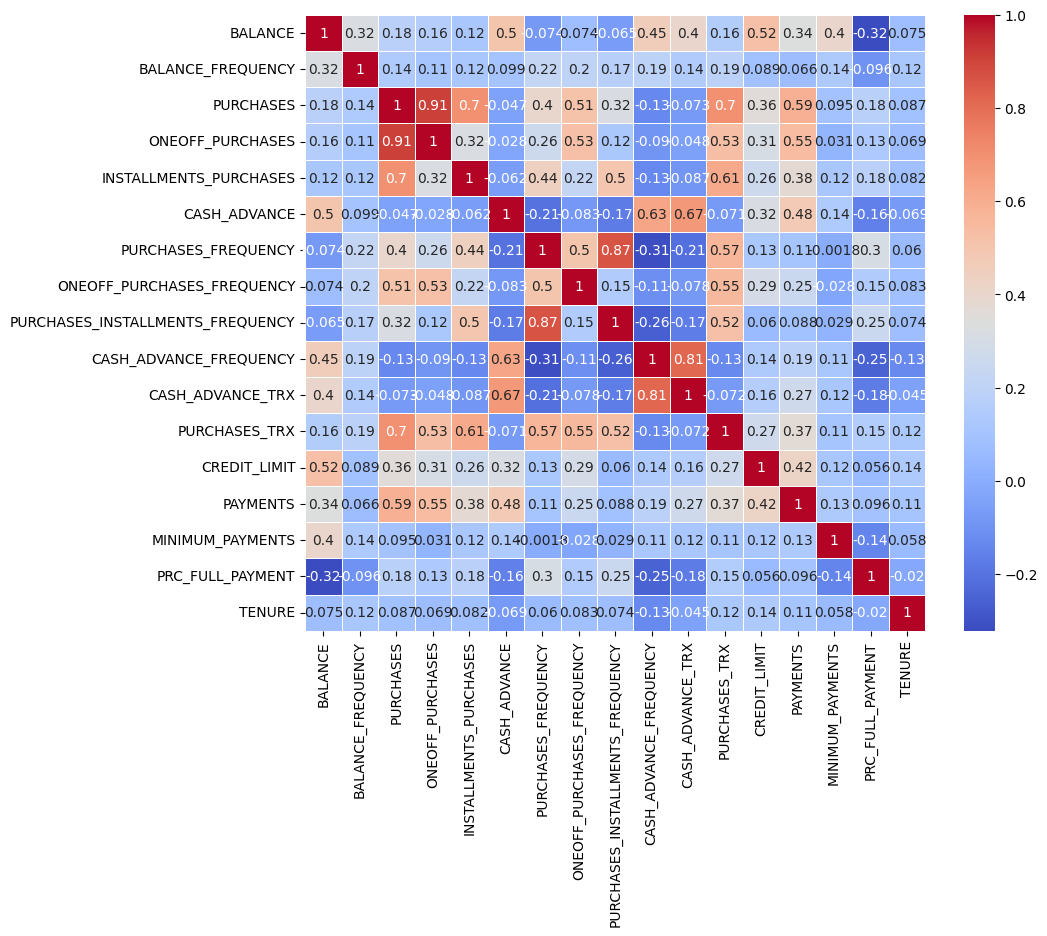

In [302]:
# analizar la correlacion que existe entre las variables
columnas_faltantes = df.columns[df.isnull().any()]
df_subset = df[columnas_faltantes]
matriz_corr = df_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [303]:
def imputar_purchases(df):
  """
  Imputa los valores de la columna 'PURCHASES' basándose en las columnas 'ONEOFF_PURCHASES' e 'INSTALLMENTS_PURCHASES'.

  """

  df_imputado = df.copy()

  #PURCHASES nulo, ONEOFF_PURCHASES y INSTALLMENTS_PURCHASES no nulos
  df_imputado['PURCHASES'] = np.where(
      (df_imputado['PURCHASES'].isnull()) & 
      (~df_imputado['ONEOFF_PURCHASES'].isnull()) & 
      (~df_imputado['INSTALLMENTS_PURCHASES'].isnull()), 
      df_imputado['ONEOFF_PURCHASES'] + df_imputado['INSTALLMENTS_PURCHASES'],
      df_imputado['PURCHASES']
  )

  return df_imputado

In [304]:
df_imputado = imputar_purchases(df)
df_imputado.isnull().sum()

CUST_ID                                0
BALANCE                              895
BALANCE_FREQUENCY                    895
PURCHASES                            166
ONEOFF_PURCHASES                     895
INSTALLMENTS_PURCHASES               895
CASH_ADVANCE                         895
PURCHASES_FREQUENCY                  895
ONEOFF_PURCHASES_FREQUENCY           895
PURCHASES_INSTALLMENTS_FREQUENCY     895
CASH_ADVANCE_FREQUENCY               895
CASH_ADVANCE_TRX                     895
PURCHASES_TRX                        895
CREDIT_LIMIT                         896
PAYMENTS                             895
MINIMUM_PAYMENTS                    1168
PRC_FULL_PAYMENT                     895
TENURE                               895
dtype: int64

In [305]:
#Porcentaje de faltantes con al menos 1 valor
filas_faltantes = df_imputado[df_imputado[columnas_faltantes].isnull().any(axis=1)]
print(f"Porcentaje de filas con 1 valor faltante es: {filas_faltantes.shape[0]/len(df_imputado)*100:.2f}%")

#Porcentaje de filas con 2 o mas valores faltantes
faltantes_2omas = df_imputado[columnas_faltantes].isnull().sum(axis=1)
filas_faltantes2 = df_imputado[faltantes_2omas > 1]
print(f"Porcentaje de filas con 2 o más valores faltantes es: {filas_faltantes2.shape[0]/len(df_imputado)*100:.2f}%")

#Porcentaje de filas con 3 valores faltantes
faltantes_3omas = df_imputado[columnas_faltantes].isnull().sum(axis=1)
filas_faltantes3 = df_imputado[faltantes_3omas > 2]
print(f"Porcentaje de filas con 3 o más valores faltantes es: {filas_faltantes3.shape[0]/len(df_imputado)*100:.2f}%")

#Porcentaje de filas con 4 valores faltantes
faltantes_4omas = df_imputado[columnas_faltantes].isnull().sum(axis=1)
filas_faltantes4 = df_imputado[faltantes_4omas > 3]
print(f"Porcentaje de filas con 4 o más valores faltantes es: {filas_faltantes4.shape[0]/len(df_imputado)*100:.2f}%")

Porcentaje de filas con 1 valor faltante es: 81.99%
Porcentaje de filas con 2 o más valores faltantes es: 50.02%
Porcentaje de filas con 3 o más valores faltantes es: 22.39%
Porcentaje de filas con 4 o más valores faltantes es: 7.79%


Al validar que existe 8% de las filas que tienen al menos 4 columnas con valores faltantes, lo cual equivale al 24% de la información. Se decide descartar todas esas filas para el análisis toda vez que la imputación de los valores será mayor al porcentaje generalmente recomendado que es de un máximo 20% de información imputada.

bibliografía: https://medium.com/@dcermak/3-steps-to-consider-before-deciding-to-impute-missing-data-692d57b76c4f#:~:text=As%20a%20general%20rule%2C%20if,sense%20to%20discard%20the%20data.

In [306]:
# Descarte de las filas con 4 o mas valores faltantes
# Contar los valores faltantes por fila
valores_faltantes_por_fila = df_imputado.isnull().sum(axis=1)

# Crear una máscara para identificar las filas con 4 o más valores faltantes
filas_a_eliminar = valores_faltantes_por_fila >= 4

# Eliminar las filas identificadas con 4 o mas valores faltantes
df_imputado_limpio = df_imputado[~filas_a_eliminar]

In [307]:
df_imputado_limpio.isnull().sum()

CUST_ID                               0
BALANCE                             723
BALANCE_FREQUENCY                   723
PURCHASES                            97
ONEOFF_PURCHASES                    700
INSTALLMENTS_PURCHASES              679
CASH_ADVANCE                        716
PURCHASES_FREQUENCY                 711
ONEOFF_PURCHASES_FREQUENCY          733
PURCHASES_INSTALLMENTS_FREQUENCY    720
CASH_ADVANCE_FREQUENCY              710
CASH_ADVANCE_TRX                    738
PURCHASES_TRX                       738
CREDIT_LIMIT                        717
PAYMENTS                            705
MINIMUM_PAYMENTS                    919
PRC_FULL_PAYMENT                    688
TENURE                              711
dtype: int64

In [308]:
print(f"Porcentaje del df imputado para trabajar versus el df original: {df_imputado_limpio.shape[0]/len(df_imputado)*100:.2f}%")

Porcentaje del df imputado para trabajar versus el df original: 92.21%


In [309]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [310]:
df2 = df_imputado_limpio[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [311]:
df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7530.000000,7530.000000,8156.000000,7553.000000,7574.000000,7537.000000,7542.000000,7520.000000,7543.000000,7536.00000,7548.000000,7334.000000,7565.000000,7542.000000
mean,1568.238805,0.880786,1000.095981,594.218195,412.722384,988.266968,0.491096,0.201357,0.135931,4475.62620,1725.795180,862.443766,0.155675,11.524794
std,2081.908849,0.231716,2105.376085,1647.178511,912.360800,2122.933980,0.401059,0.297912,0.201562,3607.10712,2843.688799,2341.333526,0.294587,1.326985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.00000,0.000000,0.019163,0.000000,6.000000
25%,130.499775,0.888889,39.957500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1600.00000,384.779826,168.842611,0.000000,12.000000
50%,876.765126,1.000000,366.250000,44.700000,89.515000,0.000000,0.500000,0.083333,0.000000,3000.00000,857.298191,309.544946,0.000000,12.000000
75%,2074.176484,1.000000,1112.425000,580.090000,473.550000,1118.361104,0.916667,0.272727,0.222222,6200.00000,1897.254276,825.431876,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.500000,30000.00000,50721.483360,76406.207520,1.000000,12.000000


Despues del análisis exporatorio y definir el df base para trabajar, se concluye que por la correlación que existe entre algunas variables del df y para evitar un efecto de multicolinealidad, la clusterización se realizará unicamente con las variables 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'. Por lo que se debe empezar a aplicar técnicas para imputar valores en dichas columnas.

Es decir que se descantan 4 columnas, el Id del cliente y la información de las trasacciónes que es la misma de la frecuencia. Con la información restante se procede a completar los valores faltas para poder obtener la información y realizar la correcta clusterización. 

https://medium.com/@perfect_silver_rhinoceros_638/credit-card-user-clustering-analysis-47cf82230049

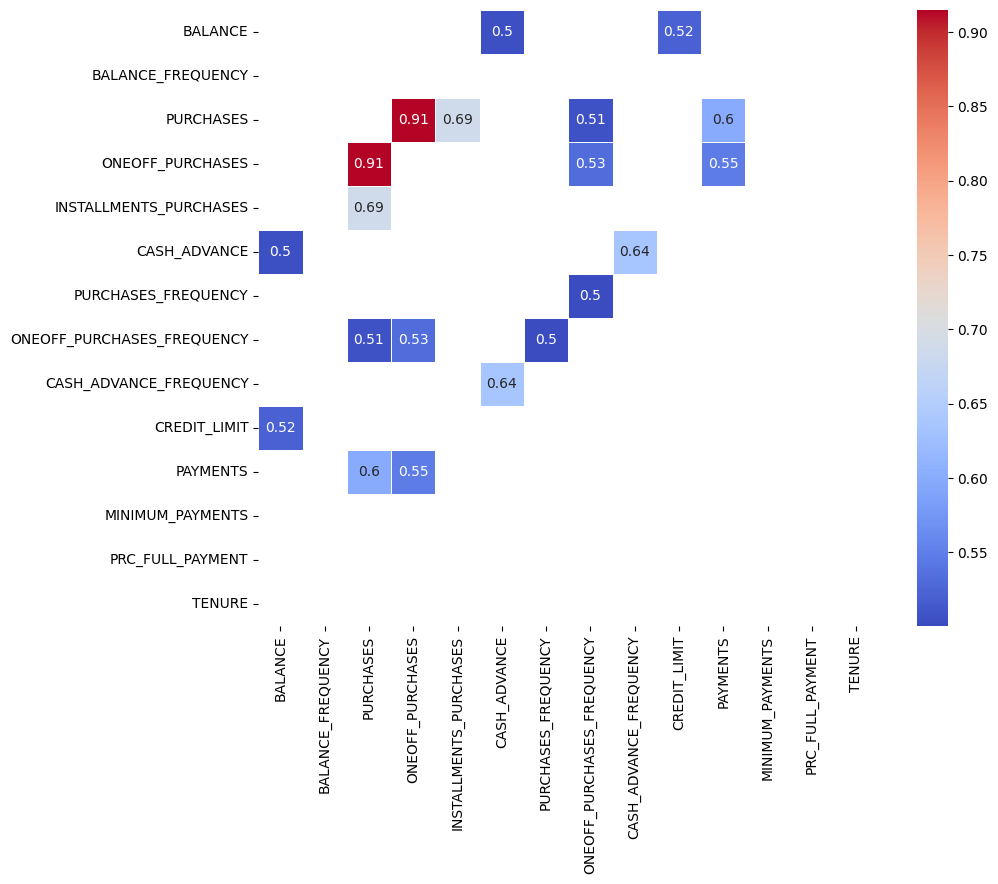

In [312]:
# Matriz de correlacion que muestra las variables mas correlacionadas >= 50%
corr_matrix = df2.corr()
umbral_corr = 0.5
alta_corr = corr_matrix[(corr_matrix.abs() > umbral_corr) & (corr_matrix != 1.0)]
plt.figure(figsize=(10, 8))
sns.heatmap(alta_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## 1.2 Imputación de valores faltantes

In [313]:
# porcentajes de valores faltantes
ratio_null_data = ((df2.isnull().sum()/len(df2))*100).sort_values(ascending = False)
ratio_null_data

MINIMUM_PAYMENTS              11.135345
ONEOFF_PURCHASES_FREQUENCY     8.881619
BALANCE                        8.760451
BALANCE_FREQUENCY              8.760451
CREDIT_LIMIT                   8.687750
CASH_ADVANCE                   8.675633
PURCHASES_FREQUENCY            8.615049
TENURE                         8.615049
CASH_ADVANCE_FREQUENCY         8.602932
PAYMENTS                       8.542348
ONEOFF_PURCHASES               8.481764
PRC_FULL_PAYMENT               8.336363
INSTALLMENTS_PURCHASES         8.227311
PURCHASES                      1.175330
dtype: float64

Vemos que para la columna purchases solo nos queda poco mas de 1% de datos con valores nulos, por lo que podriamos descartarlos. Tomando en consideraciones las mismas recomendaciones de la imputación.

bibliografía: https://medium.com/@dcermak/3-steps-to-consider-before-deciding-to-impute-missing-data-692d57b76c4f#:~:text=As%20a%20general%20rule%2C%20if,sense%20to%20discard%20the%20data.

In [314]:
df2_imputado = df2.copy()

In [315]:
df2_imputado = df2_imputado.dropna(how='all', subset=['PURCHASES'])

In [316]:
df2_imputado.reset_index(drop=True)
df2_imputado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7436.000000,7437.000000,8156.000000,7505.000000,7529.000000,7443.000000,7452.000000,7429.000000,7451.000000,7445.000000,7453.000000,7245.000000,7469.000000,7451.000000
mean,1569.389778,0.880766,1000.095981,593.987166,413.268199,990.771151,0.490560,0.200864,0.136152,4471.124116,1725.965326,863.308925,0.155377,11.523285
std,2085.125552,0.231893,2105.376085,1650.580462,914.078186,2130.514801,0.401161,0.297449,0.201856,3609.230329,2854.336379,2347.378814,0.294087,1.329112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,130.001403,0.888889,39.957500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1600.000000,384.275314,168.938924,0.000000,12.000000
50%,879.589448,1.000000,366.250000,44.000000,89.450000,0.000000,0.500000,0.083333,0.000000,3000.000000,855.075968,309.542834,0.000000,12.000000
75%,2073.799853,1.000000,1112.425000,576.000000,473.620000,1117.794681,0.916667,0.272727,0.222222,6200.000000,1891.721179,826.013735,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.500000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [317]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES              651
INSTALLMENTS_PURCHASES        627
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS              911
PRC_FULL_PAYMENT              687
TENURE                        705
dtype: int64

In [318]:
df2_imputado[["MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]].describe()

,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7245.000000,7469.000000,7451.000000
mean,863.308925,0.155377,11.523285
std,2347.378814,0.294087,1.329112
min,0.019163,0.000000,6.000000
25%,168.938924,0.000000,12.000000
50%,309.542834,0.000000,12.000000
75%,826.013735,0.142857,12.000000
max,76406.207520,1.000000,12.000000


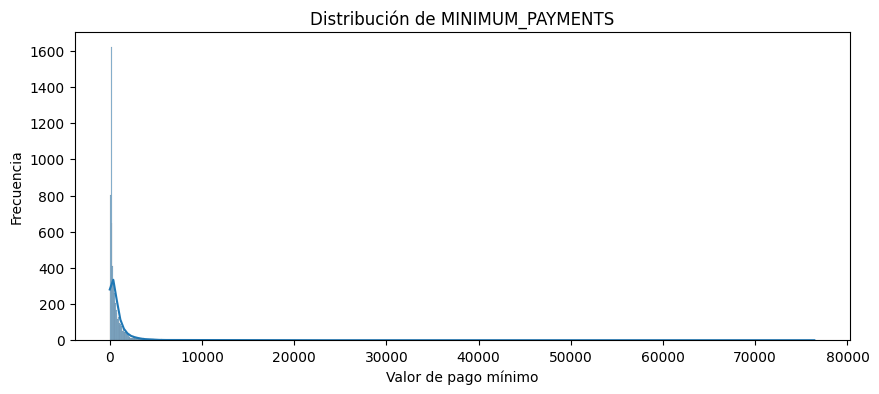

In [319]:
# Para MINIMUM_PAYMENTS (variable continua con muchos outliers)
plt.figure(figsize=(10, 4))
sns.histplot(data=df2_imputado, x='MINIMUM_PAYMENTS', kde=True)  # Histograma con curva de densidad
plt.title('Distribución de MINIMUM_PAYMENTS')
plt.xlabel('Valor de pago mínimo')
plt.ylabel('Frecuencia')
plt.show()

MINIMUM_PAYMENTS (Histograma con densidad):
* El eje X muestra los valores de pago mínimo (de 0 a 80000)
* El eje Y muestra la frecuencia
Hay una concentración muy alta de pagos mínimos cercanos a 0
La distribución tiene una "cola larga" hacia la derecha
Hay muy pocos casos con pagos mínimos altos

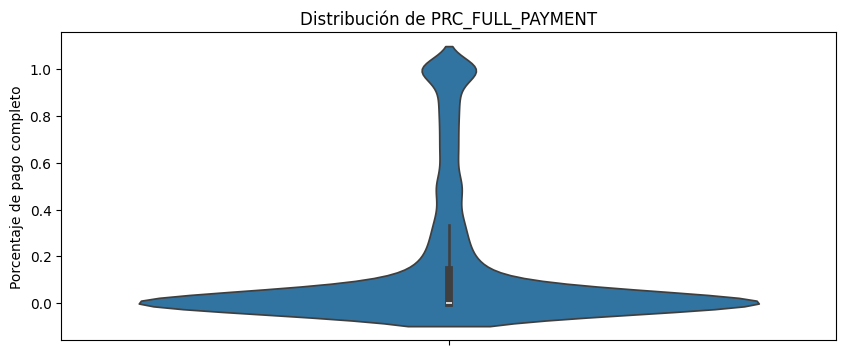

In [320]:
# Para PRC_FULL_PAYMENT (variable de proporción entre 0 y 1)
plt.figure(figsize=(10, 4))
sns.violinplot(y=df2_imputado['PRC_FULL_PAYMENT'])  # Violin plot muestra mejor la densidad
plt.title('Distribución de PRC_FULL_PAYMENT')
plt.ylabel('Porcentaje de pago completo')
plt.show()

PRC_FULL_PAYMENT (Violin plot):
* El eje Y muestra el porcentaje de pago completo (0 a 1)
* El ancho del "violín" muestra la densidad de observaciones

* Tiene forma bimodal (dos "bultos")
* Hay una concentración alta cerca de 0 (personas que pagan poco)
* Hay otra concentración cerca de 1 (personas que pagan completo)
* La parte del medio es más delgada (pocos casos intermedios)
* La línea negra del medio muestra el rango intercuartílico

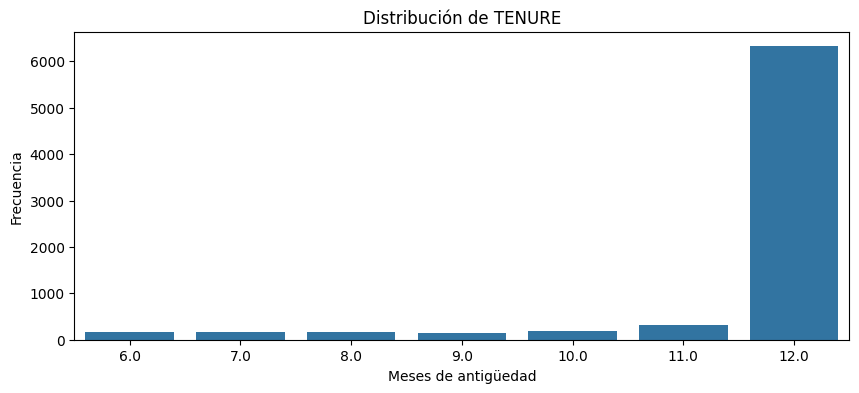

In [321]:
# Para TENURE (variable discreta/categórica ordinal)
plt.figure(figsize=(10, 4))
sns.countplot(data=df2_imputado, x='TENURE')  # Gráfico de barras para datos discretos
plt.title('Distribución de TENURE')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Frecuencia')
plt.show()

TENURE (Gráfico de barras):
Muestra la distribución de la antigüedad de los clientes en meses
* El eje X muestra los meses (6 a 12)
* El eje Y muestra la frecuencia (cantidad de clientes)

La mayoría de los clientes (más de 6000) tienen 12 meses de antigüedad
Hay una distribución muy desigual, con pocos clientes en los meses 6-11

Por ser una variable discreta y temporal, el uso de la moda parece ser apropiado

In [322]:
# Usando moda
df2_imputado['TENURE'] = df2_imputado['TENURE'].fillna(df2_imputado['TENURE'].mode()[0])

*MINIMUM_PAYMENTS*

* La variable muestra una distribución altamente sesgada (asimétrica)
* Tiene una alta concentración de valores cercanos a cero
* Presenta valores atípicos significativos

KNN es apropiado porque:
* Preserva la estructura no normal de los datos
* No se ve tan afectado por los valores atípicos como la media
* Considera las relaciones con otras variables del dataset

*PRC_FULL_PAYMENT*

* Exhibe una distribución bimodal clara (dos picos)
* Los valores están restringidos entre 0 y 1
* Muestra patrones de comportamiento específicos (clientes que pagan todo o casi nada)

KNN es adecuado porque:

* Mantiene la naturaleza bimodal de la distribución
* Respeta los límites naturales de la variable (0-1)
* Puede capturar patrones complejos en los datos

In [323]:
# 1. Seleccionar las columnas que necesitan imputación
columnas_a_imputar = ['MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# 2. Crear una copia del DataFrame solo con las columnas necesarias
df_para_imputar = df2_imputado[columnas_a_imputar].copy()

# 3. Aplicar MinMaxScaler para normalizar los datos
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(
    scaler.fit_transform(df_para_imputar),
    columns=columnas_a_imputar,
    index=df_para_imputar.index
)

# 4. Configurar el KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# 5. Aplicar la imputación en los datos normalizados
datos_imputados_normalizados = imputer.fit_transform(df_normalizado)

# 6. Desnormalizar los datos para devolverlos a la escala original
df_imputado_desnormalizado = pd.DataFrame(
    scaler.inverse_transform(datos_imputados_normalizados),
    columns=columnas_a_imputar,
    index=df_normalizado.index
)

# 7. Actualizar las columnas en el DataFrame original
df2_imputado[columnas_a_imputar] = df_imputado_desnormalizado

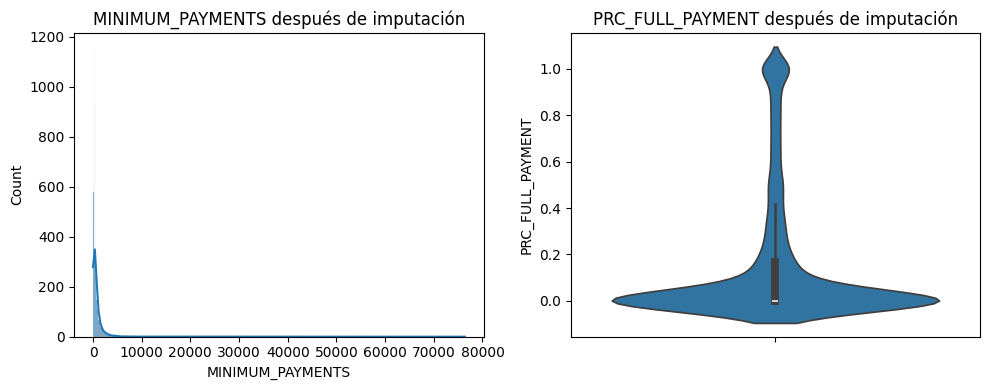

In [324]:
# Visualizar las distribuciones después de la imputación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# MINIMUM_PAYMENTS después de imputación
sns.histplot(data=df2_imputado, x='MINIMUM_PAYMENTS', kde=True, ax=ax1)
ax1.set_title('MINIMUM_PAYMENTS después de imputación')

# PRC_FULL_PAYMENT después de imputación
sns.violinplot(y=df2_imputado['PRC_FULL_PAYMENT'], ax=ax2)
ax2.set_title('PRC_FULL_PAYMENT después de imputación')

plt.tight_layout()
plt.show()

Vemos que la imputacion con KNN mantuvo la distribucion de los datos

Valores nulos después de la imputación:

In [325]:
df2_imputado[columnas_a_imputar].isnull().sum()

MINIMUM_PAYMENTS    0
PRC_FULL_PAYMENT    0
dtype: int64

In [326]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES              651
INSTALLMENTS_PURCHASES        627
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

Ahora procedemos a imputar ONEOFF_PURCHASES e INSTALLMENTS_PURCHASES  considerando la relacion matematica 

PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES 

In [327]:
# Donde PURCHASES está completo pero faltan las otras dos
mask_purchase_complete = (
    df2_imputado['PURCHASES'].notna() & 
    (df2_imputado['ONEOFF_PURCHASES'].isna() | df2_imputado['INSTALLMENTS_PURCHASES'].isna())
)

# Si tenemos ONEOFF_PURCHASES, podemos calcular INSTALLMENTS_PURCHASES
mask_oneoff = (
    df2_imputado['PURCHASES'].notna() & 
    df2_imputado['ONEOFF_PURCHASES'].notna() & 
    df2_imputado['INSTALLMENTS_PURCHASES'].isna()
)
df2_imputado.loc[mask_oneoff, 'INSTALLMENTS_PURCHASES'] = \
    df2_imputado.loc[mask_oneoff, 'PURCHASES'] - df2_imputado.loc[mask_oneoff, 'ONEOFF_PURCHASES']

# Si tenemos INSTALLMENTS_PURCHASES, podemos calcular ONEOFF_PURCHASES
mask_installments = (
    df2_imputado['PURCHASES'].notna() & 
    df2_imputado['ONEOFF_PURCHASES'].isna() & 
    df2_imputado['INSTALLMENTS_PURCHASES'].notna()
)
df2_imputado.loc[mask_installments, 'ONEOFF_PURCHASES'] = \
    df2_imputado.loc[mask_installments, 'PURCHASES'] - df2_imputado.loc[mask_installments, 'INSTALLMENTS_PURCHASES']

Procedemos a ver la cantidad de valores nulos de las columnas mencionadas

In [328]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES               46
INSTALLMENTS_PURCHASES         46
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

Procedemos a ver el porcentaje de filas con valores nulos restantes:

In [329]:
# Calcular el total de filas
total_filas = len(df2_imputado)

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df2_imputado.isnull().sum() / total_filas * 100).round(2)

# Mostrar solo las columnas que tienen valores nulos
print("Porcentaje de valores nulos por columna:")
print(porcentaje_nulos[porcentaje_nulos > 0])

Porcentaje de valores nulos por columna:
BALANCE                       8.83
BALANCE_FREQUENCY             8.82
ONEOFF_PURCHASES              0.56
INSTALLMENTS_PURCHASES        0.56
CASH_ADVANCE                  8.74
PURCHASES_FREQUENCY           8.63
ONEOFF_PURCHASES_FREQUENCY    8.91
CASH_ADVANCE_FREQUENCY        8.64
CREDIT_LIMIT                  8.72
PAYMENTS                      8.62
dtype: float64


In [330]:
# Definir las columnas de compras
columnas_compras = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']

# 1. Identificar filas donde la relación matemática ya es correcta
diferencia_original = df2_imputado['PURCHASES'] - \
    (df2_imputado['ONEOFF_PURCHASES'] + df2_imputado['INSTALLMENTS_PURCHASES'])
filas_correctas = abs(diferencia_original) <= 0.01

# 2. Crear una copia para trabajar
df_temp = df2_imputado.copy()

# 3. Aplicar interpolación a las columnas de compras
for columna in columnas_compras:
    df_temp[columna] = df_temp[columna].interpolate(method='linear')

# 4. Verificar si aún quedan valores nulos (en los extremos)
# Si quedan, usar forward fill y backward fill
for columna in columnas_compras:
    df_temp[columna] = df_temp[columna].fillna(method='ffill').fillna(method='bfill')

# 5. Ajustar los valores para mantener la relación matemática
mask_ajuste = ~filas_correctas  # Solo ajustar donde la relación no era correcta
if mask_ajuste.any():
    total_actual = df_temp.loc[mask_ajuste, 'ONEOFF_PURCHASES'] + \
        df_temp.loc[mask_ajuste, 'INSTALLMENTS_PURCHASES']
    factor = df_temp.loc[mask_ajuste, 'PURCHASES'] / total_actual
    
    df_temp.loc[mask_ajuste, 'ONEOFF_PURCHASES'] *= factor
    df_temp.loc[mask_ajuste, 'INSTALLMENTS_PURCHASES'] *= factor

# 6. Actualizar el DataFrame original solo donde era necesario
df2_imputado[columnas_compras] = df_temp[columnas_compras]

C:\Users\mrumb\AppData\Local\Temp\ipykernel_21164\685992195.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp[columna] = df_temp[columna].fillna(method='ffill').fillna(method='bfill')


Valores nulos después de imputación:

In [331]:
nulos_restantes = df2_imputado[columnas_compras].isnull().sum()
nulos_restantes

ONEOFF_PURCHASES          2
INSTALLMENTS_PURCHASES    2
dtype: int64

In [332]:
total_filas = df2_imputado.shape[0]
porcentaje_nulos = (2 / total_filas) * 100

print(f"Total de filas en el dataset: {total_filas}")
print(f"Número de valores nulos: {nulos_restantes}")
print(f"Porcentaje que representan los valores nulos: {porcentaje_nulos:.2f}%")

Total de filas en el dataset: 8156
Número de valores nulos: ONEOFF_PURCHASES          2
INSTALLMENTS_PURCHASES    2
dtype: int64
Porcentaje que representan los valores nulos: 0.02%


Los valores nulos restantes represetan menos del 1%, por tanto, podemos desecharlos para los sigueintes pasos

In [333]:
filas_antes = len(df2_imputado)
df2_imputado = df2_imputado.dropna(subset=columnas_compras)
filas_despues = len(df2_imputado)

print(f"Filas antes de dropna: {filas_antes}")
print(f"Filas después de dropna: {filas_despues}")
print(f"Filas eliminadas: {filas_antes - filas_despues}")

Filas antes de dropna: 8156
Filas después de dropna: 8154
Filas eliminadas: 2


Verificar que se mentenga la relacion matematica ONEOFF_PURCHASES e INSTALLMENTS_PURCHASES = 0

In [334]:
diferencia_original.describe()

count    8.110000e+03
mean    -1.198360e-01
std      4.773716e+00
min     -2.987900e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.275958e-12
dtype: float64

In [335]:
diferencia_final = abs(df2_imputado['PURCHASES'] - 
                (df2_imputado['ONEOFF_PURCHASES'] + df2_imputado['INSTALLMENTS_PURCHASES']))

diferencia_final.describe()

count    8.154000e+03
mean     1.599549e-14
std      1.322151e-13
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.275958e-12
dtype: float64

Luego de la imputacion, al verificar la relación matemática (PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES), encontramos algunas discrepancias:
* La mayoría de los casos (hasta el 75%) tienen una diferencia de 0, lo cual es ideal
* Sin embargo, hay algunos casos con diferencias significativas (máximo de 7.28)
* La desviación estándar de 1.32 sugiere que hay valores atípicos importantes

In [336]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES                0
INSTALLMENTS_PURCHASES          0
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

Bibliografía del metodo de imputacion mediante interpolacion: 
*https://rpubs.com/wilsonsr/804544

In [337]:
df2_imputado.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [338]:
df2_imputado.reset_index(drop=True)
df2_imputado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7434.000000,7435.000000,8154.000000,8154.000000,8154.000000,7441.000000,7450.000000,7427.000000,7449.000000,7443.000000,7451.000000,8154.000000,8154.000000,8154.000000
mean,1569.494686,0.880734,1000.205568,587.735791,412.469777,990.963425,0.490558,0.200862,0.136166,4471.183534,1726.170017,812.582920,0.155223,11.564386
std,2085.321576,0.231916,2105.604838,1629.154599,906.793795,2130.764068,0.401132,0.297470,0.201877,3609.599453,2854.685327,2217.913244,0.286145,1.277546
min,0.000000,0.000000,0.000000,-227.300000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,130.093859,0.888889,40.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1600.000000,384.246803,173.636454,0.000000,12.000000
50%,879.589448,1.000000,366.250000,39.000000,89.410000,0.000000,0.500000,0.083333,0.000000,3000.000000,855.075968,367.079856,0.000000,12.000000
75%,2073.323059,1.000000,1112.875000,571.410000,469.995000,1118.361104,0.916667,0.272727,0.222222,6200.000000,1892.038249,750.706644,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.500000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Para las columnas con valores faltantes, es decir : 'BALANCE', 'BALANCE_FREQUENCY', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', que se observa existe una correlación de al menos 0.5, se las procede a imputar utilizando la técnica de MICE (Multivariate Imputation by Chained Equations), teniendo como un valor completo el de PURCHASES. 

bibliografía: 
https://medium.com/@piyushkashyap045/handling-missing-values-in-machine-learning-with-iterative-imputer-mice-a-beginners-guide-194210fcde44

https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html

In [339]:
df_mice = df2_imputado.drop(columns=['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

# Crear el imputador iterativo (MICE)
imputer = IterativeImputer(random_state=1, initial_strategy='median')

# Aplicar el imputador al DataFrame
df_imputado_mice = pd.DataFrame(imputer.fit_transform(df_mice), columns=df_mice.columns)

df_imputado_mice.isnull().sum()

BALANCE                       0
BALANCE_FREQUENCY             0
PURCHASES                     0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
CASH_ADVANCE_FREQUENCY        0
CREDIT_LIMIT                  0
PAYMENTS                      0
dtype: int64

In [340]:
df_temp1 = df2_imputado[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].reset_index(drop=True)
df_temp2 = df_imputado_mice.reset_index(drop=True)
df_final = pd.concat([df_temp1, df_temp2], axis=1)
df_final = df_final.reindex(columns=df2_imputado.columns)
df_final.isnull().sum()


BALANCE                       0
BALANCE_FREQUENCY             0
PURCHASES                     0
ONEOFF_PURCHASES              0
INSTALLMENTS_PURCHASES        0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
CASH_ADVANCE_FREQUENCY        0
CREDIT_LIMIT                  0
PAYMENTS                      0
MINIMUM_PAYMENTS              0
PRC_FULL_PAYMENT              0
TENURE                        0
dtype: int64

In [341]:
df_final.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,1567.855915,0.880789,1000.205568,587.735791,412.469777,991.578285,0.490797,0.202134,0.136109,4492.121833,1728.174188,812.582920,0.155223,11.564386
std,2037.352837,0.223550,2105.604838,1629.154599,906.793795,2088.723294,0.390119,0.289870,0.197963,3524.693640,2808.166083,2217.913244,0.286145,1.277546
min,-817.702536,0.000000,0.000000,-227.300000,0.000000,-2748.404594,-0.138891,-0.124644,-0.108896,150.000000,-46.164660,0.019163,0.000000,6.000000
25%,163.085103,0.850240,40.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1800.000000,398.197361,173.636454,0.000000,12.000000
50%,910.450767,1.000000,366.250000,39.000000,89.410000,42.939775,0.500000,0.083333,0.051638,3397.461089,873.335469,367.079856,0.000000,12.000000
75%,2046.646301,1.000000,1112.875000,571.410000,469.995000,1131.923754,0.916667,0.316113,0.200000,6000.000000,1920.896683,750.706644,0.166667,12.000000
max,19043.138560,1.271329,49039.570000,40761.250000,22500.000000,47137.211760,1.748779,2.273940,1.500000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1.3  Detección y Eliminación de Valores atípicos

Graficos de caja para mostrar todos los valores atípicos que existen en cada columna.

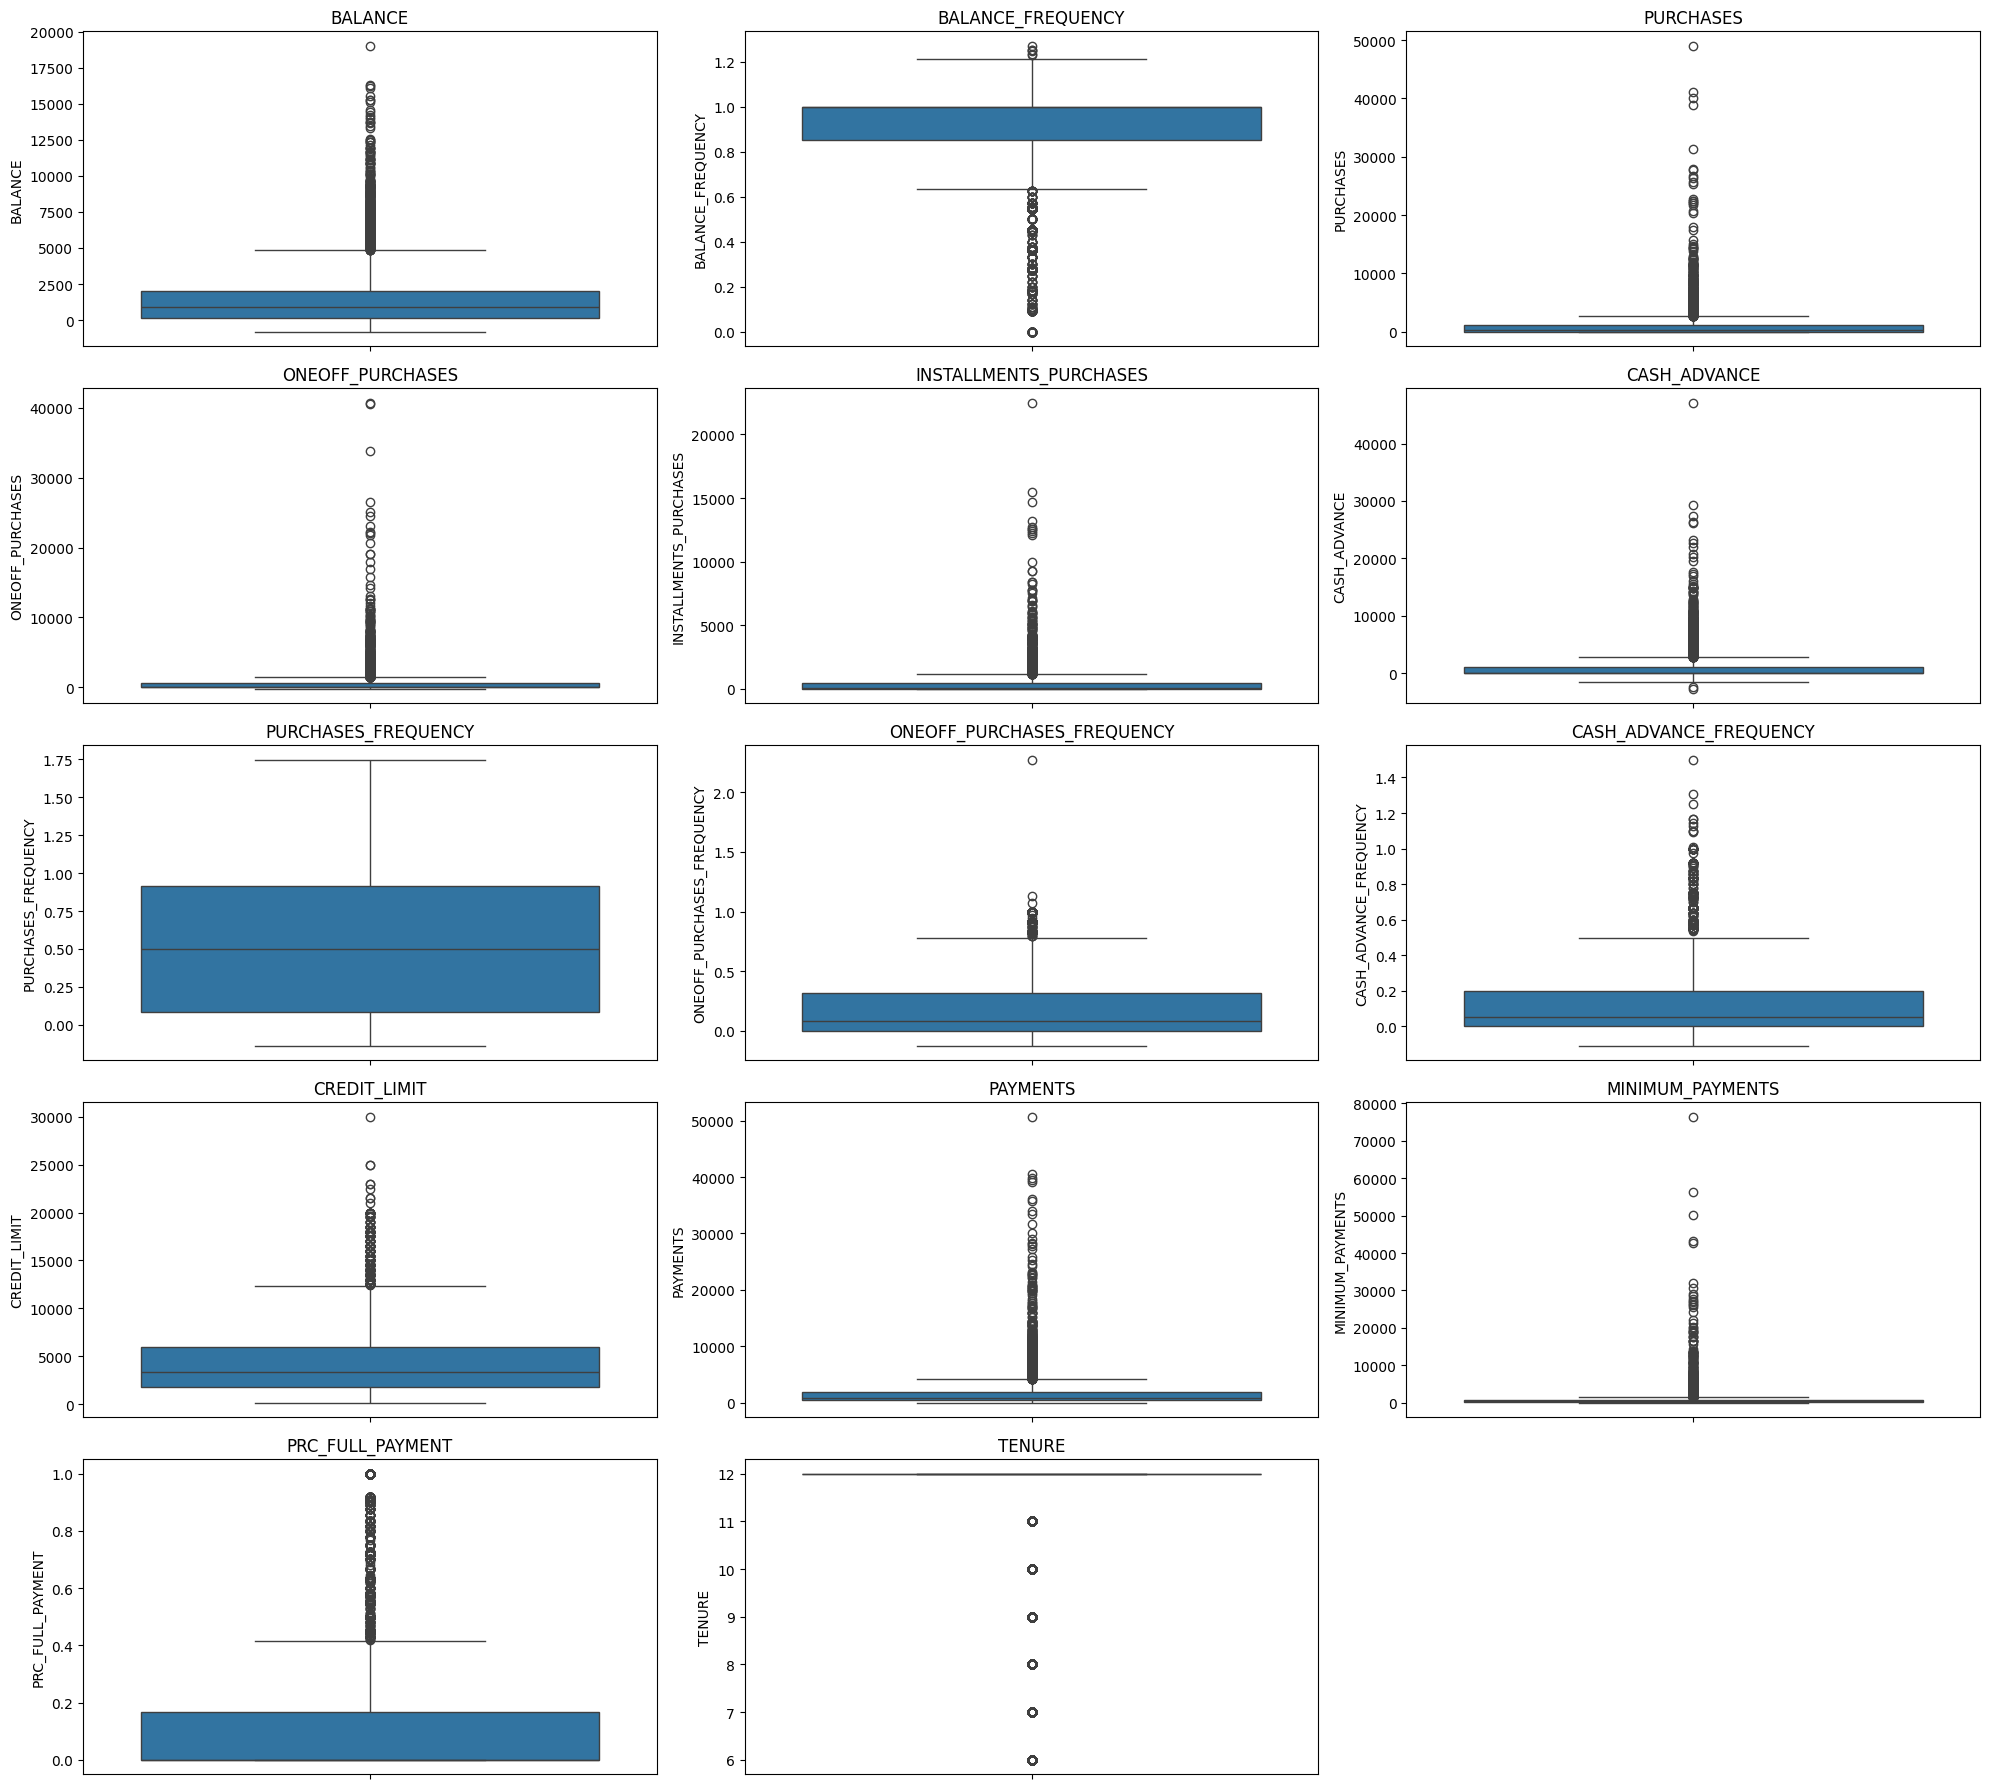

In [342]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(df_final.columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y=df_final[col])
    plt.title(col)

plt.tight_layout()
plt.show()

En el análisis de valores atípicos, se observa que existen valores negativos. Estos valores deben tratarse como errores toda vez que en el entendimiento de negocio de las tarjetas de crédito no puede haber compras de contado negativas si el total de compras en la información estadística no es menor a cero. Por lo tanto se procede a descartar todas las filas en las que se tenga valores de negativo y que del describe se puede observar que son las columnas : BALANCE, ONEOFF_PURCHASES, CASH_ADVANCE,	PURCHASES_FREQUENCY	ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY,	PAYMENTS. El resto de valores, no se lo puede considerar como atípicos.

In [343]:
#remover valores atípicos negativos
columnas_negativo = [
    'BALANCE', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PAYMENTS'
]

# Filtrar el DataFrame para eliminar filas con valores negativos en esas columnas
df_sin_atipicos = df_final[(df_final[columnas_negativo] >= 0).all(axis=1)]

# Mostrar la cantidad de filas antes y después del filtrado
print(f"Filas antes: {df_final.shape[0]}")
print(f"Filas después: {df_sin_atipicos.shape[0]}")

Filas antes: 8154
Filas después: 7956


In [344]:
df_sin_atipicos.reset_index(drop=True, inplace=True)
df_sin_atipicos.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000
mean,1582.999839,0.884575,977.765907,571.198283,406.567625,1004.612558,0.489773,0.201471,0.137832,4482.720526,1707.401445,820.072102,0.152023,11.566993
std,2036.456112,0.218229,1957.152155,1512.511842,883.782795,2092.158688,0.388729,0.287843,0.198127,3490.492706,2717.597132,2234.698039,0.282536,1.272703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,170.455483,0.857143,40.977500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1800.000000,401.555260,174.354541,0.000000,12.000000
50%,930.482506,1.000000,365.130000,40.550000,87.160000,56.461550,0.500000,0.083333,0.061732,3400.647778,876.974793,373.426201,0.000000,12.000000
75%,2073.610124,1.000000,1106.890000,567.752500,466.725000,1149.097023,0.916667,0.306727,0.220177,6000.000000,1915.144654,760.524489,0.166667,12.000000
max,19043.138560,1.271329,41050.400000,40624.060000,22500.000000,47137.211760,1.748779,2.273940,1.500000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1.4 Transformación de datos y creación variable categórica

count    7956.000000
mean        5.933297
std         1.130272
min         0.018982
25%         5.166810
50%         5.925395
75%         6.635322
max        11.243832
Name: MINIMUM_PAYMENTS_Log, dtype: float64


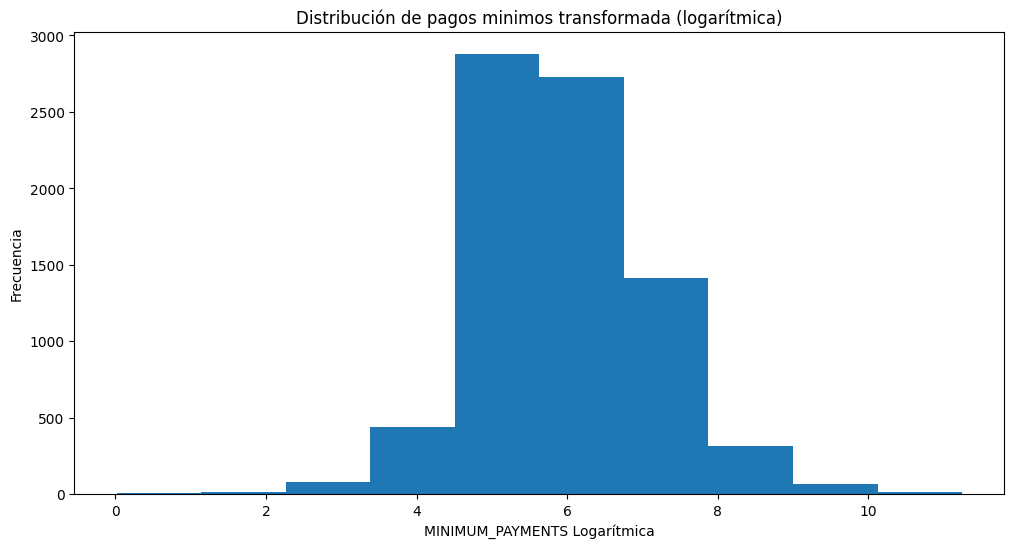

In [345]:
df_cleaned = df_sin_atipicos.copy()
# Aplicar transformación logarítmica para manejar MINIMUM_PAYMENTS
df_cleaned['MINIMUM_PAYMENTS_Log'] = np.log1p(df_cleaned['MINIMUM_PAYMENTS'])


# Ver los datos transformados
print(df_cleaned.MINIMUM_PAYMENTS_Log.describe())
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['MINIMUM_PAYMENTS_Log'], bins=10)
plt.title("Distribución de pagos minimos transformada (logarítmica)")
plt.xlabel("MINIMUM_PAYMENTS Logarítmica")
plt.ylabel("Frecuencia")
plt.show()

Se crea una categoría del limite de crédito por rangos: bins=[0, 1000, 2500, 4500, 6500, 8500, df_cleaned['CREDIT_LIMIT'].max()]; para hacer un análisis categórico y no manejar la variable continua. 

In [346]:
df_cleaned['CREDIT_LIMIT_CATEGORY'] = pd.cut(
    df_cleaned['CREDIT_LIMIT'],
    bins=[0, 1000, 2500, 4500, 6500, 8500, df_cleaned['CREDIT_LIMIT'].max()],
    labels=[1, 2, 3, 4, 5, 6],
    right=True
)

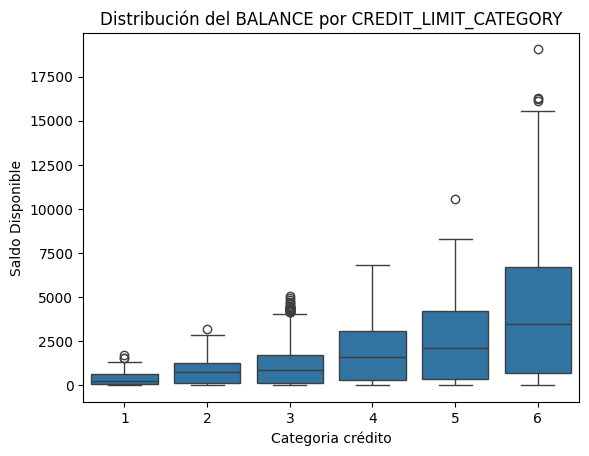

In [347]:
sns.boxplot(x=df_cleaned['CREDIT_LIMIT_CATEGORY'], y=df_cleaned['BALANCE'])
plt.title('Distribución del BALANCE por CREDIT_LIMIT_CATEGORY')
plt.xlabel('Categoria crédito')
plt.ylabel('Saldo Disponible')
plt.show()

## 1.5 Generación de Insights

Utilizando las categorias de crédito creadas, se procede a realizar un análisis de los Saldos, Compras, Avances y Pagos Minimos Log.

<Figure size 1600x1000 with 0 Axes>

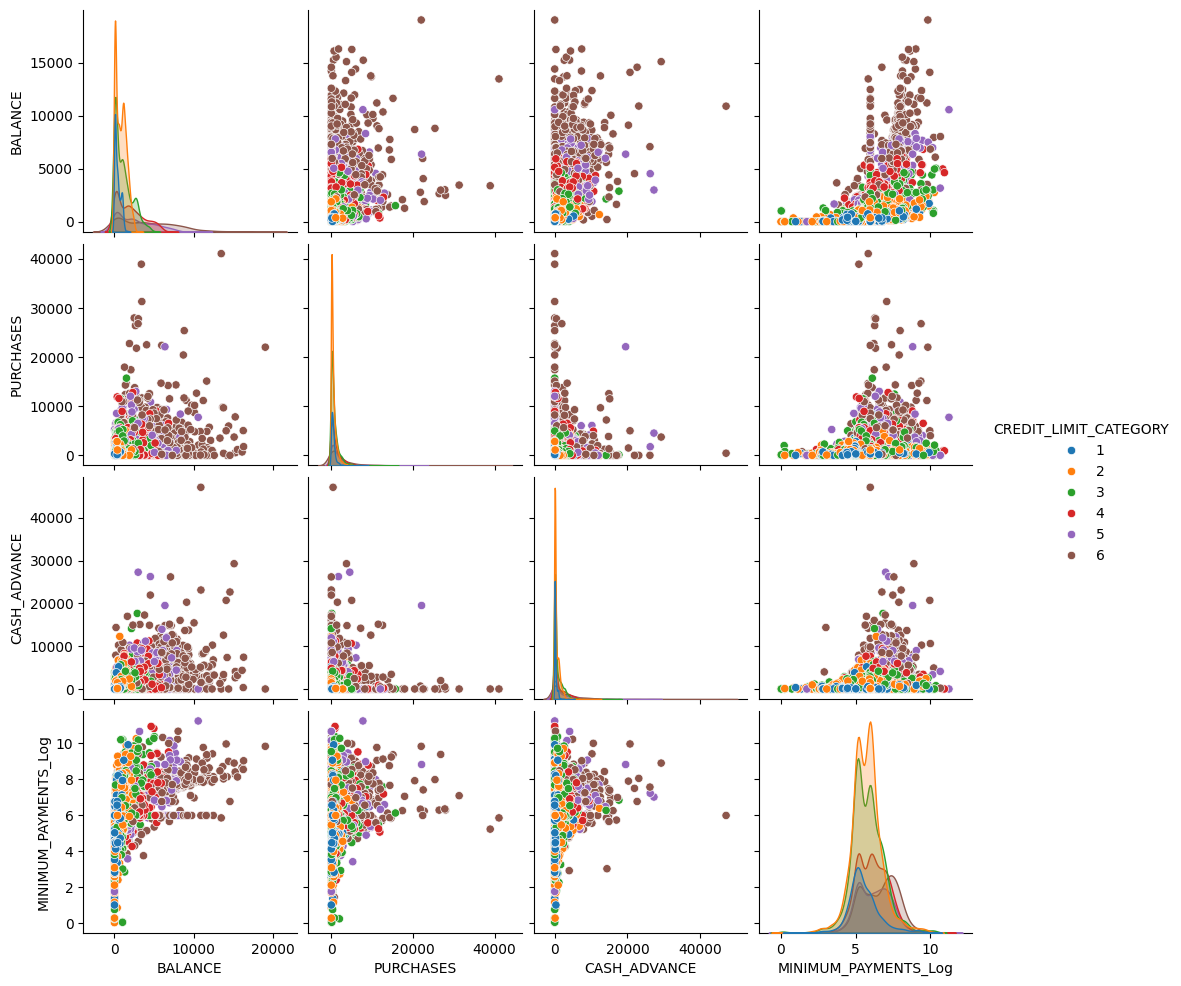

In [348]:
cluster_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE','MINIMUM_PAYMENTS_Log']

plt.figure(1, figsize=(16,10))
sns.pairplot(data=df_cleaned[cluster_cols+['CREDIT_LIMIT_CATEGORY']], hue='CREDIT_LIMIT_CATEGORY')
plt.show()

Al aplicar estas categorías y relacionar las variables ['BALANCE', 'PURCHASES', 'CASH_ADVANCE','MINIMUM_PAYMENTS_Log'], se observan diferentes comportamientos.

1. En el grupo 1 que comprende a limite de crédito hasta 1,000: 
    - No son la mayor población de clientes. 
    - Son los clientes que realizan los pagos minimos de menor valor con relación a sus compras. 
    - Realizan mayormente avances en efectivo con su saldo disponible.

2. En el grupo 2 que comprende a limite de crédito de 1,000 hasta 2,500:
    - Comprende la mayor población de clientes.
    - Tienen un comportamiento de pago con relación al saldo mejor que los grupos 3 y 4.
    - Destinan el crédito para realizar compras.

3. Grupos 3 y 4 que comprenden crédito de 2,500 hasta 6,500:
    - Los dos grupos tienen un comportamiento similar.
    - Se observa que a mayor es el crédito mayor compras y avances de efectivo.

4. Grupos 5 y 6 que comprenden crédito desde 6,500 hasta el maximo.
    - Son los de menor población.
    - Son los grupos que el monto es mayor en sus compras y avances.

En general se observa que a mayor es el límite de crédito, mayor es el monto de las compras y avances. 

# 2. Clustering

## 2.1 Aplicar Clustering

### Escalamiento del Dataframe

Previo a realizar el clustering se debe hacer el escalamiento y encoding. En este caso no es necesario realizar encoding. Las variables son numéricas. Hay categoricas binarias, variables continuas y categoricas ordinales. Por lo tanto los algoritmos de ml podrán interpretar correctamente.

El escalamiento es recomendable para el clustering con K-Means toda vez que la distancia euclidiana entre los puntos afecta a definir el cluster correspondiente.

In [349]:
variables = df_cleaned.columns

# Crear un transformer para las columnas numéricas (escalado)
numeric_transformer = MinMaxScaler()

# Crear un ColumnTransformer que aplique el escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, variables),
    ])

In [350]:
# Ajustar y transformar los datos con el preprocesador
data_preprocessed = preprocessor.fit_transform(df_cleaned)

# Mostrar los datos preprocesados
print(data_preprocessed)

[[0.04483679 0.64356439 0.00232397 ... 1.         0.53146596 0.4       ]
 [0.1681691  0.62223706 0.         ... 1.         0.62001262 0.8       ]
 [0.13102614 0.78657853 0.01883465 ... 1.         0.57230266 0.8       ]
 ...
 [0.00100736 0.78657853 0.00730809 ... 0.         0.53146596 0.        ]
 [0.01755539 0.65548184 0.00351763 ... 1.         0.5824959  0.        ]
 [0.01957178 0.52438595 0.0266319  ... 0.         0.53146596 0.2       ]]


In [351]:
# Crear el nuevo DataFrame con los datos preprocesados
df_preprocessed = pd.DataFrame(data_preprocessed, columns=variables)

# Mostrar el nuevo DataFrame
print("DataFrame preprocesado:")
print(df_preprocessed)

DataFrame preprocesado:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.044837           0.643564   0.002324          0.000000   
1     0.168169           0.622237   0.000000          0.000000   
2     0.131026           0.786579   0.018835          0.019032   
3     0.114056           0.500550   0.036516          0.036899   
4     0.042940           0.786579   0.000390          0.000394   
...        ...                ...        ...               ...   
7951  0.010165           0.655482   0.024670          0.024929   
7952  0.001496           0.786579   0.007092          0.000000   
7953  0.001007           0.786579   0.007308          0.000000   
7954  0.017555           0.655482   0.003518          0.000000   
7955  0.019572           0.524386   0.026632          0.026911   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.095305   
1                   0.000000      0.136685       

### Entrenamiento Modelo

In [352]:
# Primero se prueba con K Means

# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

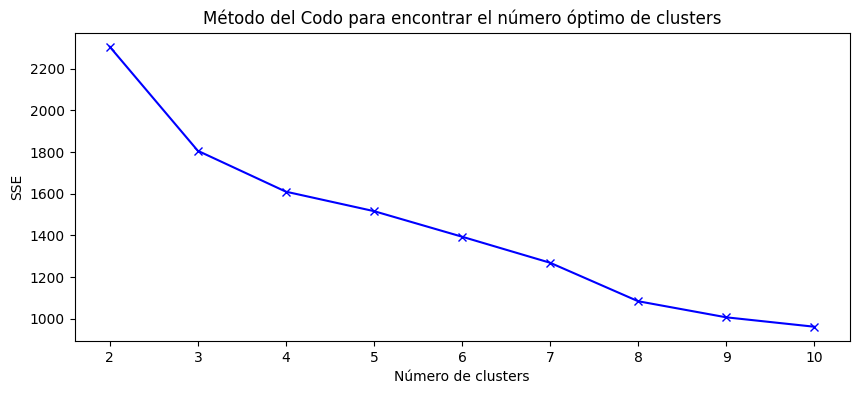

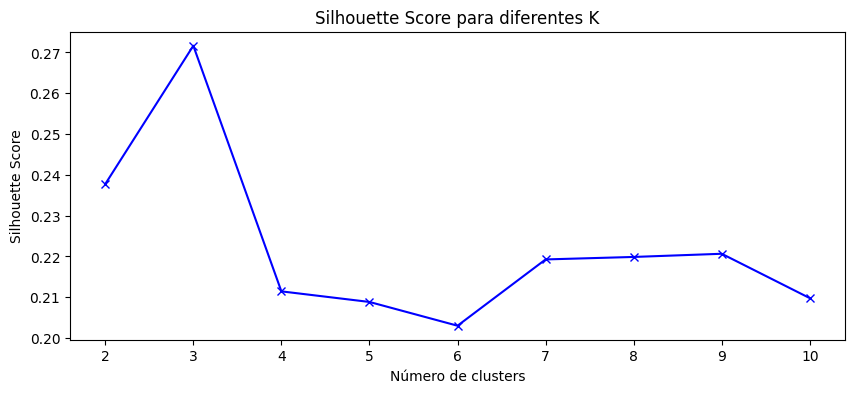

In [353]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 4))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 4))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

Se observan 3 Clusters de datos. 

In [354]:
# Aplicar KMeans
optimal_k = 3  # Elegido basado en los gráficos

kmeans = KMeans(n_clusters=optimal_k, random_state=2)
kmeans_labels = kmeans.fit_predict(df_preprocessed)

In [355]:
kmeans_silhouette = silhouette_score(df_preprocessed, kmeans_labels)

# Obtener la inercia para KMeans
kmeans_inertia = kmeans.inertia_

# Mostrar los resultados
print(f"KMeans - Silhouette Score: {kmeans_silhouette}")
print(f"KMeans - Inercia (SSE): {kmeans_inertia}")

KMeans - Silhouette Score: 0.27165676544206036
KMeans - Inercia (SSE): 1805.4714645252575


## 2.2 Caracterización de Clusters

In [356]:
# Imputacion de cluster categorico
df_preprocessed['KMeans_Cluster'] = kmeans_labels

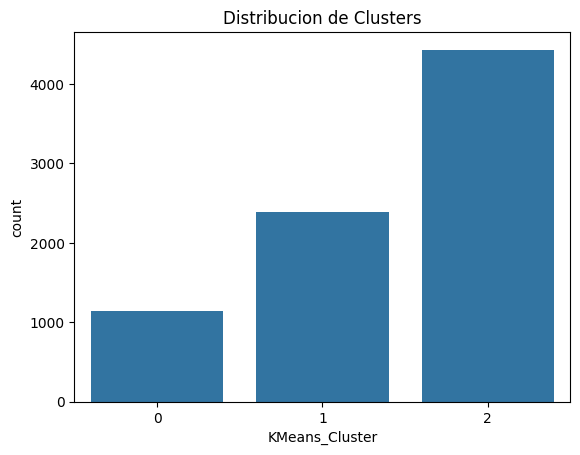

In [357]:
sns.countplot(data=df_preprocessed, x='KMeans_Cluster')
plt.title('Distribucion de Clusters')
plt.show()

Se observa que el cluster 2 es el más poblado y que la suma del 0 con el 1 incluso es menor.

In [358]:
df_preprocessed.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'MINIMUM_PAYMENTS_Log', 'CREDIT_LIMIT_CATEGORY', 'KMeans_Cluster'],
      dtype='object')

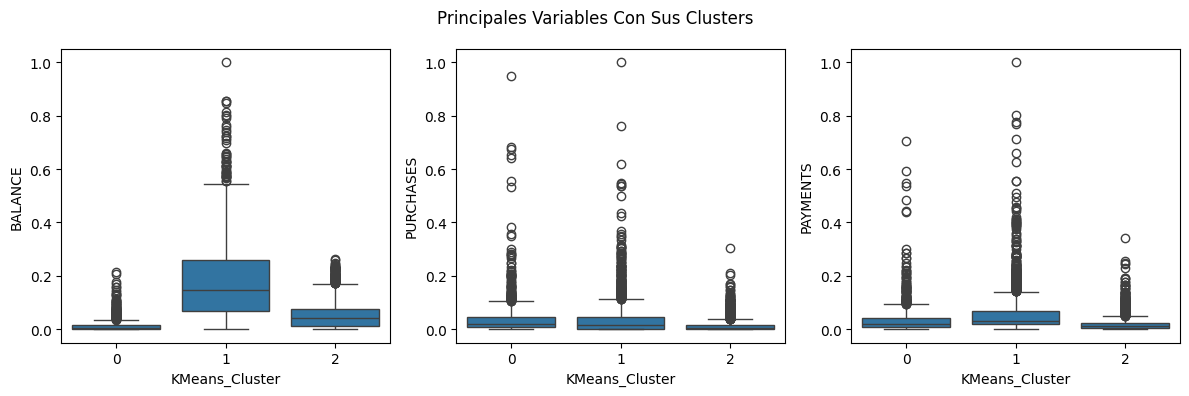

In [359]:
# análisis de los cluster en las variables PRINCIPALES.

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
cols = ['BALANCE', 'PURCHASES', 'PAYMENTS']

# Crear cada gráfico
for i in range(len(cols)):
    sns.boxplot(data=df_preprocessed, x='KMeans_Cluster', y=cols[i], ax=axs[i])

# Título y ajustes
fig.suptitle('Principales Variables Con Sus Clusters')
plt.tight_layout()
plt.show()

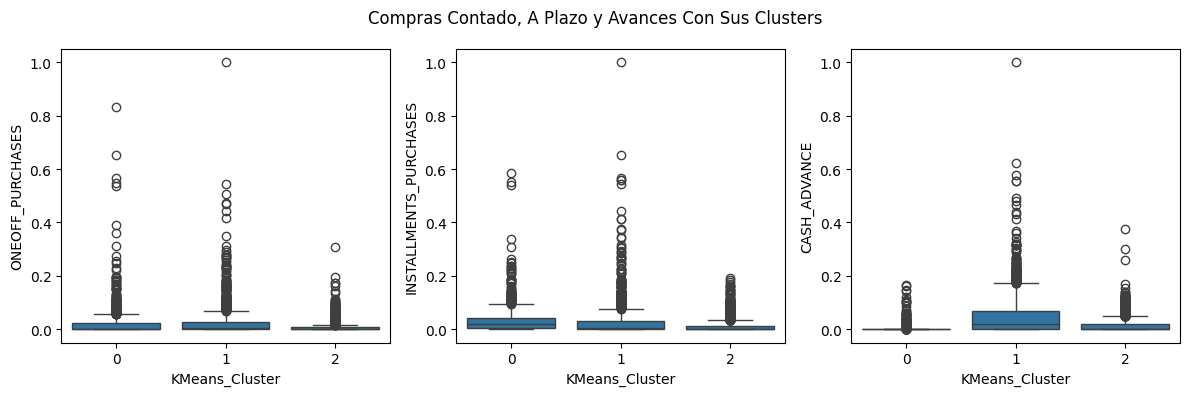

In [360]:
# análisis de los cluster en las variables COMPRAS DE CONTADO, A PLAZO Y AVANCES EN EFECTIVO.

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
cols2 = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

# Crear cada gráfico
for i in range(len(cols)):
    sns.boxplot(data=df_preprocessed, x='KMeans_Cluster', y=cols2[i], ax=axs[i])

# Título y ajustes
fig.suptitle('Compras Contado, A Plazo y Avances Con Sus Clusters')
plt.tight_layout()
plt.show()

# 3. Interpretación del Clusters

Interpretación de Clusters según Principales Variables:

    Cluster 0 - Corresponde a clientes con Balance Menor, Compras Ligeramente Mayores y Pagos Intermedios.
    Cluster 1 - Corresponde a clientes con Balance Mayor, Compras Intermedias y Pagos Mayores.
    Cluster 2 - Corresponde a clientes con Balance Intermedio, Compras Intermedias y Pagos Ligeramente intermedios.

Es decir que con relación a las variables Balance, Compras y Pagos, el cluster 0 es de menor monto de menor monto de transacciones y el cluster 1 es el de mayor monto.

Interpretación de Clusters según el uso:

    Cluster 0 - Corresponde a clientes que realizan mayormente compras a plazo y casi nulo avances en efectivo.
    Cluster 1 - Corresponde a clientes que realizan mayormente avances en efectivo y compras de contado.
    Cluster 2 - Corresponde a clientes que no realizan trasacciones de contado, muy pocas compras a plazo y algo de avances en efectivo.

Es decir que con relación a las variables de uso de la tarjeta para compras de contado, a plazo y avances, el cluster 0 destina el crédito para compras a plazo, el cluster 1 utiliza el crédito para avances en efectivo y el cluster 2 no utiliza mayormente su crédito y cuando lo utiliza es para compras a plazo o para avances.

### Bibliografía

https://medium.com/@dcermak/3-steps-to-consider-before-deciding-to-impute-missing-data-692d57b76c4f#:~:text=As%20a%20general%20rule%2C%20if,sense%20to%20discard%20the%20data.

https://medium.com/@piyushkashyap045/handling-missing-values-in-machine-learning-with-iterative-imputer-mice-a-beginners-guide-194210fcde44

https://www.machinelearningplus.com/machine-learning/mice-imputation/

https://medium.com/@perfect_silver_rhinoceros_638/credit-card-user-clustering-analysis-47cf82230049

https://medium.com/@isabeljohnson06/understanding-credit-card-usage-patterns-insights-from-cluster-analysis-66761a3da9a2

https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html

https://www.geeksforgeeks.org/k-nearest-neighbours/

https://rpubs.com/wilsonsr/804544
